## 1.
In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

Machine learning is applying statistical or computer science methods on data to draw insights, predict future events , and identify and understand different data patterns. 

# There are 2 types of Machine Learning: Supervised and Unsupervised. 

In supervised learning there’s a target variable we’re trying to predict. That target variable supervises what the model is optimized for. Supervised ML model uses the input values to predict the target variable.
On the contrary, the Unsupervised model only has the input features and no 1 target variable to predict. It uses these input features to identify the groups of similar observations.

The main difference betweent he supervised and unsupervised model is the presense of that 1 target variable to predict in supervised model and the absense of it in the unsupervised model, which uses the input features to figure out the groups of similar patterns.

# Here’re some examples of when to use ML.

## Supervised:
--> Marketing: Predict which customers are likely to purchase next month
--> Marketing: predict an expected customer value
--> Financial:Which transaction attributes predict a potential fraud
--> Banking: Predict which customers will default on their mortgage payments
--> Manufacturing: predicting if certain products in production are faulty and should be manually inspected
--> Manufacturing: Predict which machines are likely to break and need maintenance
--> Transportation: Predict the expected delivery of a parcel
--> Transportation: Identify the fastest route for driving
--> Predict a demand of stock and prepare enough stock

## Unsupervised:
--> Marketing: Grouping customers into segments based on their purchase history
--> Financial: Group transaction into segments to identify which transactions are most profitable based on the transactions attributes
--> ManufacturingGroup readings from machine sensors and identify anomalies and outliers for potential manufacturing malfunctions


## 2. 
Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statistics as stats
from scipy import stats

file_to_load = "loans_full_schema.csv"

loan_df = pd.read_csv(file_to_load)

In [15]:
loan_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [26]:
pd.options.display.max_columns = None
loan_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,0,NaN,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [29]:
loan_df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.

In [4]:
loan_df["verified_income"].value_counts()

Source Verified    4116
Not Verified       3594
Verified           2290
Name: verified_income, dtype: int64

In [5]:
#method1
verified_map = {'Source Verified':2,'Not Verified':0,'Verified':1}
loan_df["verified_income"] = loan_df["verified_income"].map(verified_map)
loan_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,1,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,2,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,0,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,1,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,2,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,1,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,1,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,2,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [6]:
#method2 --> nominal values
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
loan_df["homeownership"]=class_labels.fit_transform(loan_df["homeownership"].values)
loan_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,0,90000.0,1,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,2,40000.0,0,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,2,40000.0,2,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,2,30000.0,0,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,2,35000.0,1,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,2,108000.0,2,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,0,121000.0,1,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,0,67000.0,1,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,0,80000.0,2,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [21]:
#method3 - one hot encoding
one_hot_df = pd.get_dummies(loan_df[["homeownership","verified_income"]])
one_hot_df

,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified
0,1,0,0,0,0,1
1,0,0,1,1,0,0
2,0,0,1,0,1,0
3,0,0,1,1,0,0
4,0,0,1,0,0,1
...,...,...,...,...,...,...
9995,0,0,1,0,1,0
9996,1,0,0,0,0,1
9997,1,0,0,0,0,1
9998,1,0,0,0,1,0


## 3.
Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words!

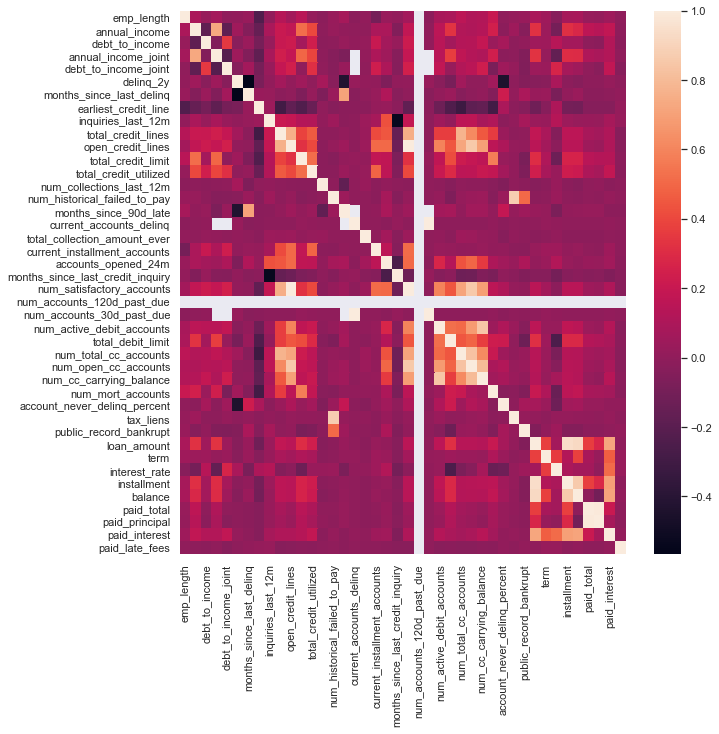

In [91]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
corrMatrix = loan_df.corr()
sns.heatmap(corrMatrix)
plt.show()

The heatmap shows how different items on x and y axes are correlated. The closer it is to 1, the stronger is the correlation.

 #### For example, here are some things are show a pretty strong correlation:
 
 --> total number of mortgageaccounts and   open credit lines
 
 --> total credit limit and total credit lines 
 
 --> tax liens and number of historical failed to pay data
 
 --> annual income and open credit lines

In [23]:
corrMatrix_df = pd.DataFrame(corrMatrix)
corrMatrix_df

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.096469,0.026157,0.071282,0.002103,0.008242,0.028790,-0.234408,0.003753,0.133472,...,0.030083,0.091255,0.056243,-0.029621,0.075981,0.086768,0.024246,0.018153,0.049517,0.001851
annual_income,0.096469,1.000000,-0.180445,0.724664,-0.179790,0.052236,-0.040392,-0.156001,0.090119,0.210163,...,-0.030568,0.324665,0.044843,-0.099584,0.315693,0.280170,0.162005,0.141893,0.174154,-0.005318
debt_to_income,0.026157,-0.180445,1.000000,-0.047284,0.348912,-0.027517,0.034637,-0.089700,0.025388,0.198647,...,0.006560,0.056329,0.046490,0.141653,0.066408,0.065996,-0.003918,-0.020116,0.121160,-0.010110
annual_income_joint,0.071282,0.724664,-0.047284,1.000000,-0.215504,0.046276,-0.049124,-0.175325,0.082176,0.240166,...,-0.047933,0.330607,0.017057,-0.165327,0.303795,0.302291,0.108933,0.092761,0.120788,-0.002689
debt_to_income_joint,0.002103,-0.179790,0.348912,-0.215504,1.000000,-0.029220,0.065376,-0.091637,0.029515,0.187683,...,-0.057415,0.045363,0.037234,0.266417,0.079405,0.055566,0.001389,-0.025166,0.177931,-0.028840
delinq_2y,0.008242,0.052236,-0.027517,0.046276,-0.029220,1.000000,-0.566551,-0.078109,0.003152,0.068040,...,-0.044865,-0.033258,-0.025936,0.090456,-0.013724,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
months_since_last_delinq,0.028790,-0.040392,0.034637,-0.049124,0.065376,-0.566551,1.000000,0.030064,0.022727,-0.014727,...,0.096420,0.029247,0.036953,-0.082930,0.008274,0.036517,-0.017350,-0.016431,-0.009362,0.005123
earliest_credit_line,-0.234408,-0.156001,-0.089700,-0.175325,-0.091637,-0.078109,0.030064,1.000000,0.042745,-0.294621,...,-0.040181,-0.117749,-0.032736,0.103635,-0.100001,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,0.003753,0.090119,0.025388,0.082176,0.029515,0.003152,0.022727,0.042745,1.000000,0.210433,...,0.081222,0.034653,0.030506,0.131193,0.043704,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.133472,0.210163,0.198647,0.240166,0.187683,0.068040,-0.014727,-0.294621,0.210433,1.000000,...,-0.002579,0.179275,0.091341,-0.044435,0.157548,0.158414,0.082315,0.068932,0.112342,-0.030621


## 4.
Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes

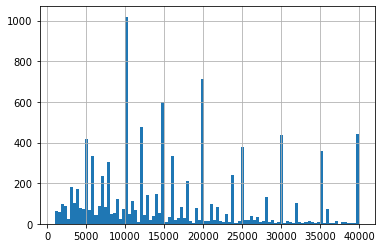

In [30]:
import matplotlib.pyplot as plt
import statistics as stats
from scipy import stats

loan_df["loan_amount"].hist(bins=100)
plt.show()

One of methods to determine a good binsize is to calculate a squareroot of number of rows in a dataset. 100 bins compared to for example 10 bins help better see data patterns.

Histogram shows us a frequency distribution which shows how often each different value in a set of data occurs. The data on this histogram seems to be skewed more to the right which means that mode is less than the median.

## 5. 
Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

a.	Is there a better way to do this than with a lambda? 

b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

In [31]:
loan_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [59]:
#loan_df["state"].value_counts()

In [36]:
regions = {"WA":"Pacific",
           "ID":"Pacific",
           "OR": "Pacific",
           "CA": "Pacific",
           "NV": "Pacific",
           "UT": "Pacific",
           "AZ": "Pacific",
           "AK":"Pacific",
           "HI": "Pacific",
           "MT": "Plains",
           "ND": "Plains",
           "WY": "Plains",
           "SD": "Plains",
           "NE": "Plains",
           "CO": "Plains",
           "KS": "Plains",
           "NM": "Plains",
           "TX": "Plains",
           "OK": "Plains",
           "AR": "South",
           "TN": "South",
           "NC": "South",
           "LA": "South",
           "MS": "South",
           "AL": "South",
           "SC": "South",
           "GA": "South",
           "FL": "South",
           "PR":"South",
           "ME":"Northeast",
          "VT": "Northeast", 
          "NH": "Northeast",
          "CT": "Northeast",
          "MA": "Northeast",
          "RI": "Northeast",
          "NY": "Northeast",
          "NJ": "Northeast",
          "PA": "Northeast",
          'WV': "Northeast",
          'VA': 'Northeast',
          'MD': 'Northeast',
          'DE': 'Northeast',
          'DC': 'Northeast',
           'MO': "Midwest",
           'IA': "Midwest",
           'MN':"Midwest",
           'WI': "Midwest",
           'IL': "Midwest",
           'KY': "Midwest",
           'IN': "Midwest",
           'MI': "Midwest",
           'OH': "Midwest"
          }

In [37]:
len(regions)

52

In [71]:
import time

In [77]:
#method 1
tic1 = time.perf_counter()
loan_df['regions'] = loan_df['state'].map(regions)
toc1 = time.perf_counter()

perf_time1= toc1-tic1
perf_time

0.007146660005673766

In [76]:
#method2 - lambda
tic2 = time.perf_counter()
loan_df["region"] = loan_df["state"].apply(lambda i: regions[i])
toc2 = time.perf_counter()

perf_time2= toc2-tic2
perf_time

0.007146660005673766

Looks like the lambda and mapping option are equally performant. Therefore, another good way to add the region column (other than using lambda) is to use the map function.

## 6.
Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

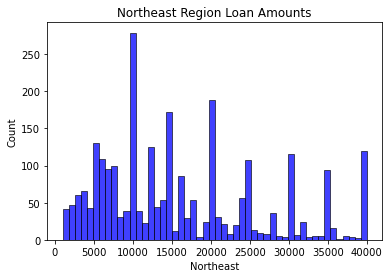

In [83]:
northeast = sns.histplot(data = loan_df[loan_df["region"]== "Northeast"]["loan_amount"], bins = 50, color = "blue")
northeast.set(xlabel = "Northeast")
northeast.set(title = "Northeast Region Loan Amounts")
plt.show()

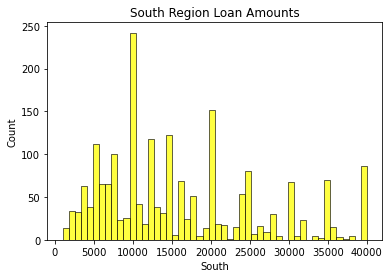

In [84]:
south = sns.histplot(data = loan_df[loan_df["region"]== "South"]["loan_amount"], bins = 50, color = "yellow")
south.set(xlabel = "South")
south.set(title = "South Region Loan Amounts")
plt.show()

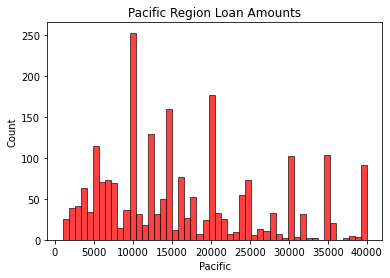

In [85]:
pacific = sns.histplot(data = loan_df[loan_df["region"]== "Pacific"]["loan_amount"], bins = 50, color = "red")
pacific.set(xlabel = "Pacific")
pacific.set(title = "Pacific Region Loan Amounts")
plt.show()

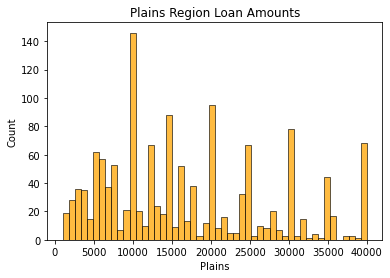

In [81]:
plains = sns.histplot(data = loan_df[loan_df["region"]== "Plains"]["loan_amount"], bins = 50, color = "orange")
plains.set(xlabel = "Plains")
plains.set(title = "Plains Region Loan Amounts")
plt.show()

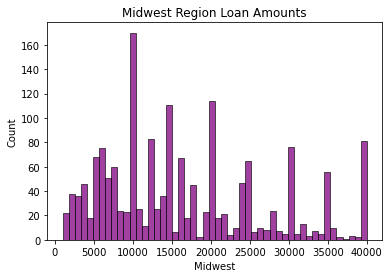

In [86]:
midwest = sns.histplot(data = loan_df[loan_df["region"]== "Midwest"]["loan_amount"], bins = 50, color = "purple")
midwest.set(xlabel = "Midwest")
midwest.set(title = "Midwest Region Loan Amounts")
plt.show()

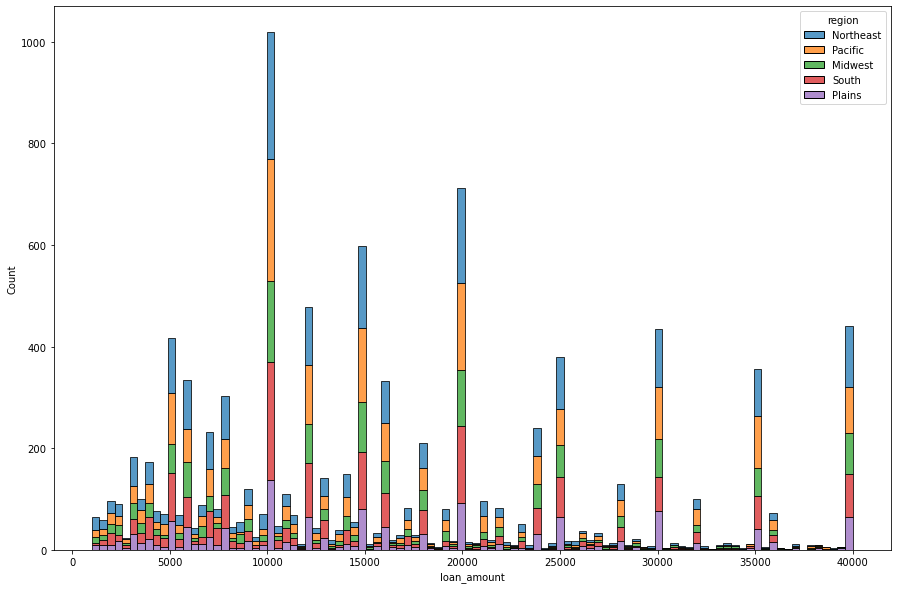

In [41]:
plt.figure(figsize=(15,10))
sns.histplot(data = loan_df, x = 'loan_amount', bins = 100, hue = 'region',  multiple="stack")
plt.show()